In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import entropy
from tqdm import tqdm, trange
import matplotlib.patches as mpatches

In [93]:
sample_num = 1000
bin_num = 30

In [95]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def selu(x):
    alpha = 1.6732  # for std scaled input
    lam = 1.0507
    if x > 0:
        return lam*x
    else:
        return alpha * (np.exp(x) - 1)

In [100]:
def get_tanh_vals():
    vals = []
    for w in tqdm(np.arange(0, 10, 0.01)):
        bins = np.zeros(bin_num + 1)  # one more bin to account for precision issues
        for i in range(sample_num):
            x = np.random.normal()
            val = np.tanh(w*x)
            bin_i = int((val + 1) * bin_num / 2)  # this is for tanh only!
            bins[bin_i] += 1
        vals.append(entropy(bins))
    return vals

In [101]:
def get_sigmoid_vals():
    vals = []
    for w in tqdm(np.arange(0, 10, 0.01)):
        bins = np.zeros(bin_num + 1)  # one more bin to account for precision issues
        for i in range(sample_num):
            x = np.random.normal()
            val = w*x
            val = sigmoid(val)
            bin_i = int(val * bin_num)  # this is for tanh only!
            bins[bin_i] += 1
        vals.append(entropy(bins))
    return vals

In [102]:
def get_relu_vals():
    vals = []
    for w in tqdm(np.arange(0, 10, 0.01)):
        bins = np.zeros(bin_num + 1)  # one more bin to account for precision issues
        for i in range(sample_num):
            x = np.random.normal()
            val = w*x
            val = val * (val > 0)
            bin_i = int((val+3) / 20 * bin_num)  # this is for relu only!
            bin_i = min(bin_i, bin_num)
            bins[bin_i] += 1
        vals.append(entropy(bins))
    return vals

In [103]:
def get_selu_vals():
    vals = []
    for w in tqdm(np.arange(0, 10, 0.01)):
        bins = np.zeros(bin_num + 1)  # one more bin to account for precision issues
        for i in range(sample_num):
            x = np.random.normal()
            val = w*x
            val = selu(val)
            bin_i = int((val + 3) * bin_num / 20)
    #         print(val, bin_i)
            bin_i = np.clip(bin_i, 0, bin_num)
            bins[bin_i] += 1
    #     print(entropy(bins))
        vals.append(entropy(bins))
    return vals

In [104]:
tanh_vals = get_tanh_vals()
sigmoid_vals = get_sigmoid_vals()
relu_vals = get_relu_vals()
selu_vals = get_selu_vals()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.03it/s]


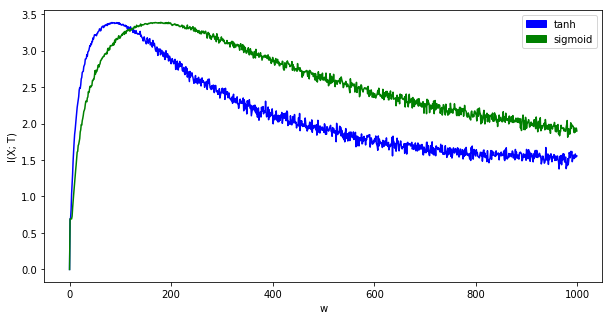

In [109]:
plt.figure(figsize=(10, 5))
plt.plot(tanh_vals, color='blue')
plt.plot(sigmoid_vals, color='green')
plt.xlabel('w')
plt.ylabel('I(X; T)')
patches = [mpatches.Patch(color='blue', label='tanh'),
           mpatches.Patch(color='green', label='sigmoid')]
plt.legend(handles=patches)
plt.savefig('sat.png')

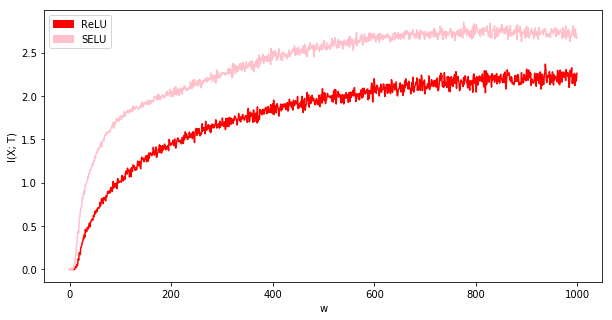

In [110]:
plt.figure(figsize=(10, 5))
plt.plot(relu_vals, color='red')
plt.plot(selu_vals, color='pink')
plt.xlabel('w')
plt.ylabel('I(X; T)')
patches = [mpatches.Patch(color='red', label='ReLU'),
           mpatches.Patch(color='pink', label='SELU')]
plt.legend(handles=patches)
plt.savefig('nonsat.png')